# 🦉COSADAMA Introduction to Data Science Study

- 일자: 2020-05-11
- 작성자: 박하람 
- 참고자료: 파이썬으로 데이터 주무르기(민형기)
- 교재: 169 - 198쪽 (깃헙 교안으로 공부하면서, 궁금한 부분은 교재를 참고하세요. 혹은 깃헙 교안을 다 보고 교재를 복습 겸 읽어봐도 됩니다!)

## 6. 셀프 주유소는 정말 저렴할까

모두들 중간고사는 무사히 잘 치르셨나요? 스스로 해보는 데이터 분석 과제도 어떤 자료를 가지고 하셨는지 무척 궁금하네요😊 오늘은 중간고사 전 마지막 주차에서 배운 웹 크롤링 BeautifulSoup을 다시 활용해볼 것이구요, urllib 라이브러리 대신 Selenium을 사용해 urllib으로 크롤링이 불가능한 사이트를 크롤링해보려 합니다. 더불어 중간고사 이전부터 학습한 pandas, Google Maps, Folium과 Seaborn 등도 모두 다시 활용해 볼 것이에요. 좋은 리뷰가 될 것 같죠?💖

이번 프로젝트는 '셀프 주요소는 정말로 저렴한지'를 팩트 체크해보는 것입니다. 한국석유공사 오피넷에서 Selenium으로 데이터를 크롤링해볼 것이구요, 엑셀파일에 담아 glob 모듈을 활용해 다수의 엑셀파일을 위치를 찾아 읽어보는 것까지 해볼 겁니다. 또한 박스 플롯으로 시각화해 실제로 셀프 주유소가 저렴한지 알아보고, 대체적으로 휘발유 값이 저렴한 구는 어디인지 Google Maps와 Folium으로 시각화해볼 겁니다.(익숙하죵?ㅎㅎ) 마지막으로는 주유소 가격 상하위 10개를 뽑아 지도에 시각화해 볼 것이랍니다. 이번 주차도 매우 흥미로운 주제이나, 다만 Selenium을 활용하는 것이 어려울 수 있어요. 그러니 궁금한 것이나 막히는 부분이 있다면 언제든 슬랙으로 질문해주세요! 그럼 이번 주차 공부도 시작합니다🐻

### 6.1 Selenium 사용하기

지난 시간에는 urllib을 활용해서 정보를 가져왔어요. 하지만 이번에는 urllib 라이브러리를 사용해 크롤링할 수 없기 때문에 이 때 사용하는 Selenium를 배워볼 것이에요. 우선, 우리가 주유소 가격과 위치를 끌어오려면, 주유소 정보들이 있는 opinet 사이트를 이용해보려 합니다. 

- [opinet - 싼 주유소 찾기 - 지역별](http://www.opinet.co.kr/searRgSelect.do): 이 페이지를 선택하면 opinet 사이트가 나올 것이에요. 여기에서 싼 주유소 찾기를 누르고, 지역별을 누르면 우리가 얻고자 하는 사이트가 나와요. 

그런데 문제는 이렇게 지역별 사이트에 들어가도, url 주소가 달라지지 않았기 때문에 해당 url을 복사해 다시 로드하면 Opinet 처음 사이트로 돌아가게 된답니다. 그럴 때에는 url 주소만 있으면 되는 urllib를 사용할 수 없겠죠. 그렇게 해서 사용하는 것이 바로 Selenium입니다.

#### Selenium 설치와 웹 드라이버 

Selenium은 터미널에 pip로 설치하시면 됩니다. 그러나 Selenium을 사용하기 위해서는 사용하는 브라우저에 맞춰 웹 드라이버를 다운 받아야 해요. 본인이 사파리를 쓰시면 사파리 웹 드라이버를, 크롬을 쓰시는 크롬 웹 드라이버를 쓰시면 돼요. 저는 크롬 드라이버가 더 깔기 편해서 크롬 드라이버를 추천드려요. 

- pip install selenium 터미널에 입력 
- [본인에게 맞는 웹브라우저 별로 드라이브 설치 - 경로설정 주의](https://sacko.tistory.com/13)

웹 브라우저를 다운받으신 후, data나 소스코드가 있는 폴더에 drive를 압축 해제해주시면 된답니다.(교재 171쪽) 이 때 파일경로가 중요한데요, 파일경로를 확인하는 방법은 아주 간단하게 Terminal(명령 프롬프트)을 열고 drive 파일을 터미널에 끌어 올려다 넣으시면 이동경로가 나타나게 됩니다. 아래 분홍색이 이동경로에요.

![파일 경로](images/file_path_img.png)

이동경로를 기억해 두시고 먼저 selenium을 import 해보겠습니다.

In [1]:
from selenium import webdriver

이동경로를 아래에다 넣어주고, get에다가는 원하는 사이트의 주소를 입력합니다.

In [2]:
driver = webdriver.Chrome('/Users/harampark/Documents/chromedriver') # 나의 이동경로라 복붙 X
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com")

#### Selenium으로 Naver 로그인하기 

어, 그러니까 갑자기 새로운 화면창이 떴죠? 위에 'Chrome이 자동화된 테스트 소프트웨어에 의해 제어되고 있습니다.'라고 하는게 뜨면 잘 된 것이랍니다. 웬만하면 이 화면은 직접 건들이지 않고, Selenium이 만지게 하는게 좋아요.(코드를 작성할 때 혼선이 생길 수 있기 때문) 

스크린샷을 하고 싶다면 아래와 같은 명령을 사용하면 됩니다.

In [3]:
# 스크린샷 - 파일 경로 확인, 확장자 확인, 미리 images 폴더 만들어놓아야 함
driver.save_screenshot('001.png')

True

![파일 경로](images/001.png)

이렇게 나오면 잘 캡처가 되었다고 할 수 있죠. 그럼 이제 Selenium으로 로그인을 해보도록 할게요. 로그인을 하려면, 크롬 개발자 도구를 사용해 아이디와 패스워드가 적힌 곳의 id를 알아야 해요. 잘 기억이 안난다면 136-138쪽을 보시구요, 이번에는 find_element_by_id를 사용해서 id를 찾는 것이랍니다!

In [5]:
elem_login = driver.find_element_by_id("id")
elem_login.clear()  # 미리 입력된 글자를 지워주는 것(자동로그인 경우)
elem_login.send_keys("********")

elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("**********")

![파일 경로](images/002.png)

이렇게 스스로 적혀져 있다면 잘 하셨습니다. 그 다음에는 로그인을 눌러야 클릭이 되잖아요? 그 클릭하는 방법은 xpath를 찾아서 클릭하는 방법이에요. 교재 174-175쪽을 보면 xpath copy를 하는 방법을 알 수 있어요. 그렇게 복사한 xpath을 아래에다 적어주시면 됩니다.

In [7]:
xpath = """//*[@id="log.login"]"""
driver.find_element_by_xpath(xpath).click() # xpath 위치를 클릭해라

![003](images/003.png)

엇, 로그인을 했는데 이렇게 막히네요. 이게 바로 캡차라는 기술인데요, 요렇게 자동으로 로그인이 되는 것을 막기 위해서 컴퓨터를 이용해 로그인 했다고 의심이 되는 로그인은 캡차로 인증하게 합니다. 네이버에서 매크로로 댓글 조작을 했니 어쨌니 이런 논란이 많았잖아요. 네이버는 아무래도 사측에서 암묵적으로 가담했다는 증거를 피하기 위해서 혹은 해킹이 쉽게 되지 않기 위해서 이런 캡차를 해놓은 것이랍니다. 

여담으로 캡차는 고서를 찍어서 올리는 경우도 있는데요, 이런 캡차도 있지만, 다른 캡차들 중에는 고서에서 컴퓨터가 알아보기 힘들지만, 사람은 입력할 수 있는 단어를 찍어서 올리기도 해요. 그래서 그 데이터를 쌓아서 충분한 데이터가 모이면 컴퓨터도 이제 그것을 읽을 수 있도록 학습하는 거죠. 신기하죵😉

#### Selenium으로 다음 사이트 로그인하기 

Anyway, 캡차를 피해가는 방법도 있지만, 이게 네이버에서 수시로 피해가는 방법을 막아버리기도 하고, 캡차를 넘어서면서까지 크롤링할 필요는 아직 없어서 다음 사이트에서 로그인을 해볼게요. 앞서 어떻게 사용하는지 알았으니, 다음 로그인 페이지는 아이디와 패스워드를 입력해 클릭하는 것까지 생각해보시고 그 다음 코드를 보면 더 좋을 것 같네요! 

- [다음 로그인 사이트](https://accounts.kakao.com/login?continue=https%3A%2F%2Flogins.daum.net%2Faccounts%2Fksso.do%3Frescue%3Dtrue%26url%3Dhttps%253A%252F%252Fwww.daum.net%252F)

In [26]:
from selenium import webdriver
import time

driver = webdriver.Chrome('/Users/harampark/Documents/chromedriver')
driver.get("https://accounts.kakao.com/login?continue=https%3A%2F%2Flogins.daum.net%2Faccounts%2Fksso.do%3Frescue%3Dtrue%26url%3Dhttps%253A%252F%252Fwww.daum.net%252F")

elem_login = driver.find_element_by_id("id_email_2")
elem_login.clear()
elem_login.send_keys("**********")
time.sleep(3)

elem_login = driver.find_element_by_id("id_password_3")
elem_login.clear()
elem_login.send_keys("**********")
time.sleep(3)

xpath = """//*[@id="login-form"]/fieldset/div[8]/button"""
driver.find_element_by_xpath(xpath).click()

![image](images/004.png)

이렇게 나오면 성공! 

#### 다음 메일 사용자 정보 얻기
그 다음에는 메일에 들어가 메일 사용자들을 크롤링해보려 합니다. 그럼 메일 사이트에 접근해야겠죠? Xpath를 이용해 클릭할 수 있겠지만, 아래처럼 바로 메일 사이트에 접근할 수 있어요.

In [27]:
# 메일 접근 
driver.get("https://mail.daum.net/")

![이메일 접근](images/005.png)

위와 같이 나오면 된겁니다. 여기에서 저렇게 빨간색 네모칸에 있는 이메일 보낸 이들을 추출해보려고 합니다. (안 쓰는 메일이라...ㅋㅋㅋㅋㅋ 코어벨 이런거 밖에 없네요.) 그 다음은 익숙한 BeautifulSoup으로 가공해주면 됩니다! 

In [28]:
from bs4 import BeautifulSoup

html = driver.page_source # 현재 접근한 페이지의 소스를 받을 수 있음.
soup = BeautifulSoup(html, 'html.parser')

크롬 개발자 도구를 사용해서 태그가 무엇이고 class는 뭔지도 알아내볼게요. a 태그의 link_from이라는 태그이고, find_all로 다 가져와 보겠습니다. (꼭 찾아보셔야 해요!) 

In [29]:
raw_list = soup.find_all('a', 'link_from')
raw_list

[<a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"영어이야기클럽 운영자" &lt;yhhah@hanmail.net&gt;'>영어이야기클럽 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨스 미국법 연구소 운영자" &lt;koa-bels@hanmail.net&gt;'>코아벨스 미국법 연구소 운영자</a>,
 <a class="link_from" href="javascript:;" title='"코아벨

잘 가져와 졌고요. 사용자 이름만 뽑아내려면 아래와 같이 하면 되겠죠.

In [30]:
raw_list[0].get_text()

'코아벨스 미국법 연구소 운영자'

그럼 for문으로 이 이름들만 가져와 볼게요. 지난 시간에 한거 떠올리시고 먼저 코드가 어떻게 작성될 지 생각한 후에 실행해보고 아래 코드들을 보시면 더 좋을 것 같네요!

In [31]:
for n in range(0, len(raw_list)):
    send_list = raw_list[n].get_text()
    print(send_list)

코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
영어이야기클럽 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자
코아벨스 미국법 연구소 운영자


이렇게 정보를 모두 얻었으니, 이만 driver를 종료해봅시다.

In [32]:
driver.close()  # 크롬 드라이버 종료

그럼 대략적인 Selenium 사용법에 대해 익힌 것 같네요. 그럼 본격적으로 이번주 프로젝트를 시작해보겠습니다. 

### 6.2 서울시 구별 주유소 가격 정보 얻기 

- [opinet - 싼 주유소 찾기 - 지역별](http://www.opinet.co.kr/searRgSelect.do)

지역별 주소 사이트를 selenium으로 들어가려면 어떻게 해야 할까요? 아래와 같이 하면 됩니다. 

In [44]:
driver = webdriver.Chrome('/Users/harampark/Documents/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")
driver.get("http://www.opinet.co.kr/searRgSelect.do") # 두번 해야 들어가 짐.

짜잔! 이렇게 두번 해주면 지역별 사이트에 들어갈 수 있어요. 

![지역별](images/006.png)

서울시 구별로 정보를 얻어올 것이니, 빨간색 박스 마포구라 적혀져 있는 곳을 바꾸어줘야겠고, 바꾼 결과로 조회 버튼까지 눌러줘야겠지요. 또 아래처럼 엑셀 저장 버튼까지 눌러줘야 엑셀로 결과가 저장되겠죠. 

![엑셀 저장](images/007.png)

그럼 우선 '구' 버튼부터 눌르며 바꿔보죠. 이 때 필요한 것이 xpath에요. 크롬 개발자 도구로 해당 구 버튼의 xpath를 copy하고요, 확보한 xpath를 이용해 element를 찾고 gu_list_raw 변수에 저장합니다.

- [selenium 문법](https://github.com/SeongJaeMoon/PracPython/blob/master/selenium_dom_selector.md)

In [45]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")

그 다음에는 구 이름이 option이라는 태그에 저장되어 있으니까, 아래와 같이 option이라는 태그를 찾아 줍니다.

In [46]:
gu_list = gu_list_raw.find_elements_by_tag_name("option")
gu_list[:5]

[<selenium.webdriver.remote.webelement.WebElement (session="a469a7b1c5b169154f414967f8278567", element="d918f706-e514-43ad-81a0-aa58f61d4ba0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a469a7b1c5b169154f414967f8278567", element="c10978a4-6320-4406-9574-e4ffe7f1bc5b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a469a7b1c5b169154f414967f8278567", element="1ee91ad2-2a32-4ac5-bc5d-7526e91d859a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a469a7b1c5b169154f414967f8278567", element="1c19bd81-6e49-4f70-9152-e24535a844ed")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a469a7b1c5b169154f414967f8278567", element="8cac6a4e-9afb-456b-a659-f226ed6e226e")>]

이것처럼 gu_list에는 우리가 원한게 잘 보이지 않죠? 구 이름은 option의 value라는 곳에 있었으니까요, value를 아래와 같이 가져옵니다.

In [47]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')  # 이것을 넣었다 빼보세요. 어떤 기능인지 알 수 있습니다.
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [52]:
len(gu_names)

25

리스트로 구성되어 있죠? 총 구가 25이네요. 이후 엑셀 파일이 총 25개가 다운로드 되었는지 확인하셔야 해요. 구 이름이 있는 태그에 gu_names에서 첫번째 것만 한번 입력해보도록 할게요. 

In [48]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

![강남구](images/008.png)

저렇게 강남구로 바뀌었죠? 그러면 이제는 조회버튼을 눌러야 되겠네요. 그럼 조회 버튼은 또 xpath를 사용해 클릭해주면 됩니다. (조회버튼 xpath copy하는 것 잊지 마세요!) 

In [49]:
#조회버튼의 Xpath를 찾아서 클릭
xpath ='''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

![강남구 조회](images/009.png)

이렇게 바뀌었다면, okay! 이제는 엑셀을 얻어야 하니까, 또 xpath를 알아내서 엑셀 저장 버튼을 클릭하면 되겠죠! 

In [50]:
xpath ='''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

그러면 웹 브라우저에서 다운로드 시 사용되는 폴더에서 '지역_위치별(주유소)'가 생성된 것을 확인할 수 있을 겁니다. 

그렇다면 이제 알았으니, 전체 구들의 엑셀 파일을 모두 가져와봅시다. 시간이 꽤 오래 걸리는 작업일 것이기 때문에 tqdm을 사용해서 걸리는 시간을 시각화 해볼 것이구요. 어떻게 코드가 구성될지 한번 생각해보신다음 아래 코드를 확인하세요! 

In [51]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names): 
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2) # 중간중간 기다리라는 time.sleep 명령 
    
    xpath ='''//*[@id="searRgSelect"]/span'''
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath ='''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

![다운로드](images/010.png)

이렇게 총 25개의 파일이 다운로드되어 있으면 됩니다. 그럼 이제 웹 드라이버를 종료하면 끝! 

In [53]:
driver.close()

### 6.3 구별 주유 가격에 대한 데이터의 정리 

이제는 구별 주유 가격에 대한 데이터를 정리해보려 합니다. 이제는 정말 익숙해진 pandas를 활용하여 이것저것 요리해부죠. 우선 다운로드 폴더에 담겨져 있는 엑셀 파일을 본인의 코드가 적혀있는 파일에다 옮깁니다. 저는 새롭게 data라는 폴더를 모두 담아서 거기다 넣어놨어요. 

#### glob으로 원하는 파일 쉽게 가져오기
원하는 파일을 가져오려면 파일경로가 필요합니다. 쉽게 파일을 가져올 수 있도록 해주는 모듈이 glob이에요. 해당 모듈들을 import 해보겠습니다.

In [54]:
import pandas as pd 
from glob import glob

- [glob의 간단한 사용법](https://wikidocs.net/83)

glob을 이용하면 쉽게 파일들을 가져올 수 있어요. 아래 *는 지역으로 시작하는 것은 모두 가져오라는 거에요. 지역 뒤의 이름은 상관이 없는거죠.

In [55]:
glob('data/지역*.xls')

['data/지역_위치별(주유소) (9).xls',
 'data/지역_위치별(주유소) (12).xls',
 'data/지역_위치별(주유소) (5).xls',
 'data/지역_위치별(주유소) (24).xls',
 'data/지역_위치별(주유소) (4).xls',
 'data/지역_위치별(주유소) (13).xls',
 'data/지역_위치별(주유소) (8).xls',
 'data/지역_위치별(주유소) (3).xls',
 'data/지역_위치별(주유소) (18).xls',
 'data/지역_위치별(주유소) (22).xls',
 'data/지역_위치별(주유소) (14).xls',
 'data/지역_위치별(주유소) (15).xls',
 'data/지역_위치별(주유소) (23).xls',
 'data/지역_위치별(주유소) (19).xls',
 'data/지역_위치별(주유소) (2).xls',
 'data/지역_위치별(주유소) (20).xls',
 'data/지역_위치별(주유소) (1).xls',
 'data/지역_위치별(주유소) (16).xls',
 'data/지역_위치별(주유소) (17).xls',
 'data/지역_위치별(주유소) (21).xls',
 'data/지역_위치별(주유소) (10).xls',
 'data/지역_위치별(주유소).xls',
 'data/지역_위치별(주유소) (7).xls',
 'data/지역_위치별(주유소) (6).xls',
 'data/지역_위치별(주유소) (11).xls']

In [56]:
len(glob('data/지역*.xls'))

25

25개도 맞네요. 그럼 이것들을 모두 가져와서 file에다 저장해보겠습니다. 

In [57]:
stations_files = glob('data/지역*.xls')
stations_files

['data/지역_위치별(주유소) (9).xls',
 'data/지역_위치별(주유소) (12).xls',
 'data/지역_위치별(주유소) (5).xls',
 'data/지역_위치별(주유소) (24).xls',
 'data/지역_위치별(주유소) (4).xls',
 'data/지역_위치별(주유소) (13).xls',
 'data/지역_위치별(주유소) (8).xls',
 'data/지역_위치별(주유소) (3).xls',
 'data/지역_위치별(주유소) (18).xls',
 'data/지역_위치별(주유소) (22).xls',
 'data/지역_위치별(주유소) (14).xls',
 'data/지역_위치별(주유소) (15).xls',
 'data/지역_위치별(주유소) (23).xls',
 'data/지역_위치별(주유소) (19).xls',
 'data/지역_위치별(주유소) (2).xls',
 'data/지역_위치별(주유소) (20).xls',
 'data/지역_위치별(주유소) (1).xls',
 'data/지역_위치별(주유소) (16).xls',
 'data/지역_위치별(주유소) (17).xls',
 'data/지역_위치별(주유소) (21).xls',
 'data/지역_위치별(주유소) (10).xls',
 'data/지역_위치별(주유소).xls',
 'data/지역_위치별(주유소) (7).xls',
 'data/지역_위치별(주유소) (6).xls',
 'data/지역_위치별(주유소) (11).xls']

#### 25개 파일 병합하기

pandas로 가공하려면 우선 이 25개의 파일들을 하나의 DataFrame에 담아야 하겠죠? 이를 모두 병합하기 위해서 열 방향으로 합쳐지는 concat 함수를 이용할 겁니다.

In [58]:
# 25개의 DataFrame이 담길 리스트
tmp_raw = []

for file_name in stations_files:
    # 한 개씩 DataFrame을 불러오기
    tmp = pd.read_excel(file_name, header=2)
    # tmp_raw에다 추가하기
    tmp_raw.append(tmp)
    
# 25개의 DataFrame 병합하기    
station_raw = pd.concat(tmp_raw)
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),현대오일뱅크,02-902-5189,N,-,1277,1077,-
1,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1277,1077,900
2,서울특별시,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),SK에너지,02-996-5151,Y,-,1279,1079,-
3,서울특별시,삼미북부셀프주유소,서울특별시 도봉구 도봉로 437 (쌍문동),SK에너지,02-992-5561,Y,-,1279,1079,1100
4,서울특별시,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),SK에너지,02-3492-7371,Y,-,1279,1079,-


이제 우리에게 익숙한 데이터프레임이네요. 여기에는 지역, 상호, 주소, 상표, 셀프여부, 휘발유 값 등이 들어있네요. 우리가 이번에 할 프로젝트의 주제는 셀프 주유소가 정말로 싼지 아닌지 팩트체크를 해보는 것이었잖아요. 그러니까 여기에서 중요한 컬럼은 셀프여부가 되겠구요, 구별로 알아보려고 했으니 주소가 중요할 겁니다. (지역은 모두 서울이라 필요가 없어요.) 이렇게 데이터의 특성을 파악하는게 중요하고요. 전반적으로 어떻게 담겨있는지 알기 위해서 아래를 확인해보았습니다.

In [59]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 9
Data columns (total 10 columns):
지역       501 non-null object
상호       501 non-null object
주소       501 non-null object
상표       501 non-null object
전화번호     501 non-null object
셀프여부     501 non-null object
고급휘발유    501 non-null object
휘발유      501 non-null object
경유       501 non-null object
실내등유     501 non-null object
dtypes: object(10)
memory usage: 43.1+ KB


중요한 컬럼이 휘발유라고 했죠? 휘발유 값만 알아볼 것인데 이게 숫자가 아닌 object로 되어 있어서 숫자형으로 바꾸어줘야 계산이 가능하겠죠. 이를 후에 처리해줘야겠죠. 

필요한 컬럼들만 추려서 stations에 담아볼게요. 중요한 것이 1) 상호 2) 주소 3) 휘발유 4) 셀프여부 5) 상호니까 이것들만 남겨보겠습니다.

In [60]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1277,N,현대오일뱅크
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1277,N,현대오일뱅크
2,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1279,Y,SK에너지
3,삼미북부셀프주유소,서울특별시 도봉구 도봉로 437 (쌍문동),1279,Y,SK에너지
4,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1279,Y,SK에너지


#### 데이터 가공하기 

이제는 주소에서 구만 뽑아서 저장해줘야겠죠. 주소에서 구만 가져올 거에요. split을 사용해 쉽게 가져오면 됩니다. 새로운 컬럼 구에다 담아주었어요.

In [61]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1277,N,현대오일뱅크,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1277,N,현대오일뱅크,도봉구
2,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1279,Y,SK에너지,도봉구
3,삼미북부셀프주유소,서울특별시 도봉구 도봉로 437 (쌍문동),1279,Y,SK에너지,도봉구
4,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1279,Y,SK에너지,도봉구


25개의 구가 모두 잘 추출되었는지 확인하기 위해서는 아래와 같이 unique()를 통해 확인할 수 있습니다.

In [62]:
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

이상하게 추출된 구도 없고, 대충 다 담긴 것 같은데, 총 25개인지 확인해보는게 좋을 것 같네요.

In [63]:
len(stations['구'].unique())

25

그 다음엔 가격들을 전반적으로 살펴보도록 할게요. false 밖에 없다는 말은 결측값이 없다는 말인데, 결측값이 없다고 다 된걸까요? 

In [68]:
stations['가격'].isnull().value_counts()

False    501
Name: 가격, dtype: int64

In [70]:
stations['가격'].unique()

array([1277, 1279, 1285, 1289, 1299, 1325, 1335, 1337, 1365, 1369, 1379,
       1383, 1498, '1447', '1457', '1498', '1567', '1569', '1619', '1639',
       '1709', '1749', '1829', '-', 1306, 1307, 1327, 1345, 1357, 1359,
       1378, 1398, 1399, 1430, 1459, 1560, 1267, 1297, 1348, 1358, 1372,
       1375, 1374, 1417, 1418, 1439, 1458, 1469, 1478, 1489, 1499, 1550,
       1329, 1344, 1349, 1680, 1917, 1354, 1392, 1397, 1480, 1495, 1525,
       1598, 1258, 1286, 1287, 1290, 1295, 1314, 1346, 1347, 1387, 1394,
       1415, 1419, 1424, 1425, 1434, 1435, 1448, 1462, 1488, 1535, 1789,
       1268, 1284, 1294, 1315, 1316, 1318, 1336, 1377, 1396, 1483, 1579,
       1787, 1420, 1490, 1898, 1988, 1998, 1999, 1319, 1407, 1409, 1428,
       1437, 1438, 1445, 1446, 1447, 1467, 1497, 1519, 1589, 1879, 1887,
       1978, 1308, 1326, 1368, 1388, 1429, 1455, 1648, 1798, 1968, 1688,
       1758, 1859, 2035, 2049, 2059, 2079, 2088, 2099, 1339, 1588, 1799,
       1840, 1875, 1890, 1929, 1930, 1936, 1257, 1

중간에 '-'가 보이시죠? '-'로 가격정보가 없는 것을 저렇게 표시해놨네요. 어떤 행이 가격 정보가 없는 것인지 불린 인덱싱을 사용해서 알아볼게요.

In [71]:
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
41,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


총 4개의 주유소에서 가격이 없군요. 이 row를 없애도록 하겠습니다. 

In [72]:
stations = stations[stations['가격'] != '-']
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구


잘 지워졌네요.

In [73]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 9
Data columns (total 6 columns):
Oil_store    497 non-null object
주소           497 non-null object
가격           497 non-null object
셀프           497 non-null object
상표           497 non-null object
구            497 non-null object
dtypes: object(6)
memory usage: 27.2+ KB


가격이 아직도 숫자가 아닌 object니 수정해보도록 하겠습니다.

In [74]:
stations['가격'] = stations['가격'].astype('float')
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 9
Data columns (total 6 columns):
Oil_store    497 non-null object
주소           497 non-null object
가격           497 non-null float64
셀프           497 non-null object
상표           497 non-null object
구            497 non-null object
dtypes: float64(1), object(5)
memory usage: 27.2+ KB


잘 변경 됐네요! 이 정도로 데이터를 가공하면 된 것 같습니다.  

### 6.4 boxplot으로 셀프 주유소 가격 확인해보기 

저어번에 boxplot에 대해 배워봤을 겁니다. 그만큼 boxplot은 데이터의 전반적인 수치들을 확인하기에 편리한 시각화에요. 셀프 주유소가 정말로 저렴한지 boxplot으로 시각화해보겠습니다. 우선 matplotlib의 한글 문제를 처리하고 필요한 모듈들을 import 할게요.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

셀프 유무에 따른 가격을 확인해보겠습니다.

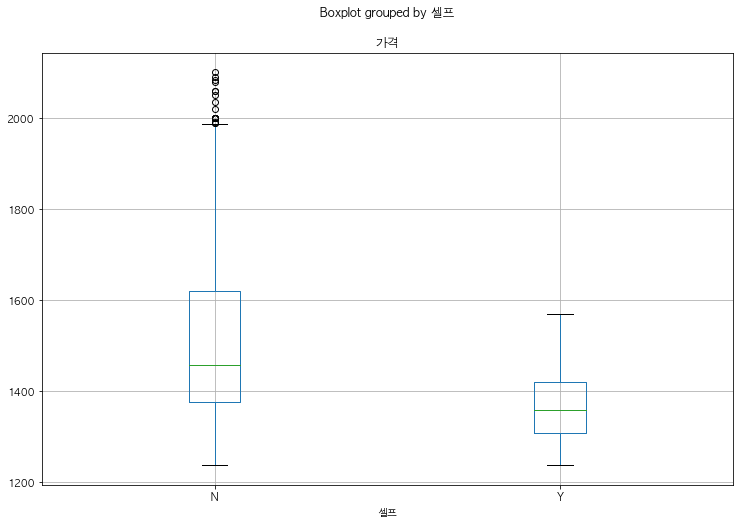

In [76]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

확실히 셀프 주유소가 싼 가격이란게 보이죠? 검은색 점들은 이상치라는 거고, 평균도 셀프주유소가 훨씬 낮고, 전반적으로 셀프 주유소가 더 싼 것을 알 수 있습니다. 

이제는 상표에 따라서 boxplot을 시각화해볼게요.

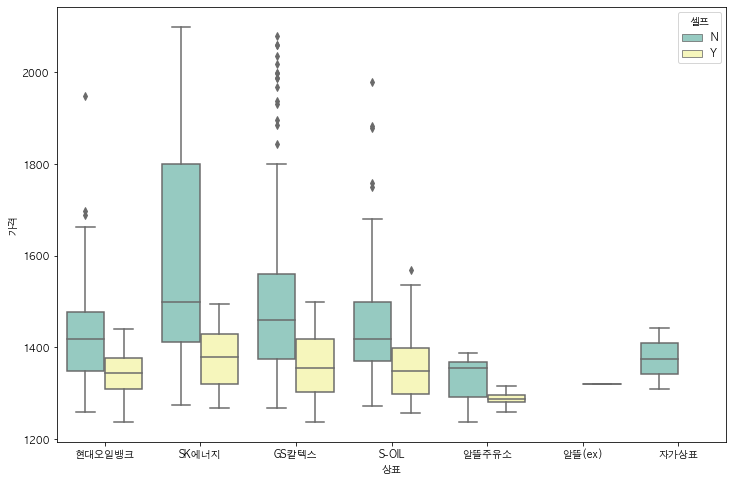

In [77]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

어헛, sk에너지가 상당히 비싸네요. 여기서도 같은 상표라도 셀프 주유소들이 더 싸게 가격이 분포되어 있고요, 알뜰 주유소가 알뜰이라는 이름 답게 싸다는 것 또한 알 수 있네요.

셀프 주유소인지 아닌지는 제외하고 상표로만 boxplot을 보겠습니다.

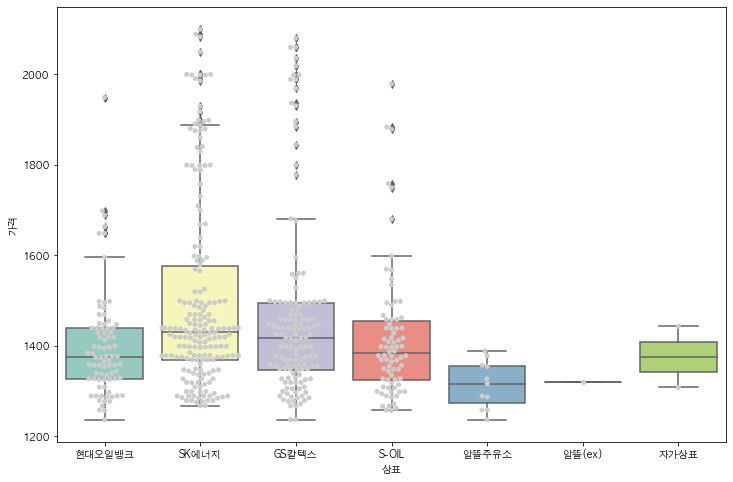

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.8')  # 1로 하면 환공포증 느낌...
plt.show()

1로 해보세요... 진짜 징그러워요...(소름) 아무튼 알뜰주유소 이용을 추천합니다ㅎㅎ 대기업들은 돈도 많으면서 더 비싸네요😅

결과적으로 '셀프 주유소는 더 저렴한가'는 맞다고 할 수 있네요! 요렇게 팩트체크를 완료해봤습니다. 

### 6.5 서울시 구별 주유 가격 확인하기 

여기까지만 하면 아쉽잖아요. 그래서 구별로 가격의 정도를 시각화해보려고 합니다. 그래서 앞서 주소에서 구를 추출한 것이에요. 이전에 사용했던 json, folium, googlemaps를 사용해서 시각화해줄 겁니다. 필요한 모듈을 import 해줄게요.

In [79]:
import json
import folium
import googlemaps
import warnings  # futurewarning 뜨지 않도록! 
warnings.simplefilter(action = "ignore", category = FutureWarning)

가격별로 먼저 제일 비싼곳부터 나열해볼게요. 딱 10개를 가져와보겠습니다.

In [80]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
11,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구
10,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2082.0,N,SK에너지,강남구
9,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2079.0,N,GS칼텍스,중구
13,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2049.0,N,SK에너지,중구
6,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2035.0,N,GS칼텍스,중구
12,수림석유 제3한강주유소,서울 용산구 한남대로 45 (한남동),2018.0,N,GS칼텍스,용산구
8,SK네트웍스(주)재동주유소,서울 종로구 율곡로 58 (경운동),1999.0,N,SK에너지,종로구


강남이 비쌀 줄 알았는데, 중구, 용산구 쪽에 비싼 주유소들이 많군요. 중구에는 광화문, 시청 등이 있어서 일까요. 상당히 비싸네요. 2000원대가 웬말입니까!! 

다음에는 저의 집이 서대문에 있어서 싼 주소가 어딨는지 알아봤어요.

In [82]:
stations[stations['구'] == '서대문구'].sort_values(by='가격')

,Oil_store,주소,가격,셀프,상표,구
0,(주)창원이엔지 홍제지점,서울 서대문구 통일로 455 (홍제동),1329.0,N,현대오일뱅크,서대문구
1,삼미상사(주)서부주유소,서울 서대문구 성산로 255 (연희동),1344.0,Y,SK에너지,서대문구
2,(주)가재울뉴타운주유소,서울 서대문구 모래내로 205,1344.0,Y,현대오일뱅크,서대문구
3,(주)마봉 구도일주유소 두꺼비,서울 서대문구 성산로 312 (연희동),1344.0,Y,S-OIL,서대문구
4,남정주유소,서울특별시 서대문구 모래내로 243 (남가좌동),1349.0,N,GS칼텍스,서대문구
5,(주)마봉 신우주유소,서울 서대문구 가좌로 106 (홍은동),1349.0,Y,S-OIL,서대문구
6,코리아상사연세주유소,서울 서대문구 연희로 184,1369.0,Y,GS칼텍스,서대문구
7,지에스칼텍스(주)홍제동주유소,서울 서대문구 통일로 372,1375.0,Y,GS칼텍스,서대문구
8,삼보셀프주유소,서울 서대문구 연희로 78 (연희동),1378.0,Y,SK에너지,서대문구
9,광호주유소,서울 서대문구 연희로 266 (홍은동),1378.0,N,SK에너지,서대문구


오홍, 1번째 index가 우리집과 제일 가까운 곳이네요^6^ 

서울시에서 가장 낮은 주유소들을 어디에 있는지도 볼게요.

In [83]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
2,강산제2주유소,서울 성북구 보국문로 52,1237.0,Y,현대오일뱅크,성북구
0,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1237.0,Y,GS칼텍스,성북구
3,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1237.0,Y,GS칼텍스,성북구
1,원천주유소,서울 성북구 돌곶이로 142 (장위동),1237.0,N,알뜰주유소,성북구
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1257.0,Y,S-OIL,강북구
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1257.0,Y,현대오일뱅크,강북구
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1258.0,Y,알뜰주유소,강서구
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1258.0,N,알뜰주유소,강서구
0,형산석유(주)원주유소,서울 양천구 남부순환로 408,1258.0,N,현대오일뱅크,양천구
1,현대주유소,서울 양천구 남부순환로 372 (신월동),1258.0,Y,S-OIL,양천구


성북구, 강북구, 강서구 이런 구들에 많군요. 

하지만 단순히 10개의 데이터를 가지고 이런 구들이 비싸다 싸다를 말하긴 힘들죠. 그래서 평균을 내서 대체적인 가격을 비교해보겠습니다. 

In [84]:
import numpy as np 
gu_data = pd.pivot_table(stations, index=['구'], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1615.775000
강동구,1461.312500
강북구,1297.461538
강서구,1381.647059
관악구,1456.375000


이것을 지도에 시각화해서 나타내보겠습니다.

In [86]:
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

오호라 이렇게 하니, 확실히 중구와 용산구가 비싸네요. 거기다 종로구도 무척 비싸고, 강남구도 확실히 비싸네요. 

### 6.6 서울시 주유 가격 상하위 10개 주유소 지도에 표시하기

이번에는 서울시에 있는 주유가격 상하위 10개 주유소를 지도에 표시해보도록 하겠습니다. 구별로 따지는게 아니라, 개별 주유소별로 따져보는 거에요. 상하위 10개 주유소만 따로 변수에 담아보겠습니다.

In [90]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
11,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구
10,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2082.0,N,SK에너지,강남구
9,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2079.0,N,GS칼텍스,중구
13,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2049.0,N,SK에너지,중구
6,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2035.0,N,GS칼텍스,중구
12,수림석유 제3한강주유소,서울 용산구 한남대로 45 (한남동),2018.0,N,GS칼텍스,용산구
8,SK네트웍스(주)재동주유소,서울 종로구 율곡로 58 (경운동),1999.0,N,SK에너지,종로구


In [91]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
2,강산제2주유소,서울 성북구 보국문로 52,1237.0,Y,현대오일뱅크,성북구
0,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1237.0,Y,GS칼텍스,성북구
3,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1237.0,Y,GS칼텍스,성북구
1,원천주유소,서울 성북구 돌곶이로 142 (장위동),1237.0,N,알뜰주유소,성북구
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1257.0,Y,S-OIL,강북구
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1257.0,Y,현대오일뱅크,강북구
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1258.0,Y,알뜰주유소,강서구
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1258.0,N,알뜰주유소,강서구
0,형산석유(주)원주유소,서울 양천구 남부순환로 408,1258.0,N,현대오일뱅크,양천구
1,현대주유소,서울 양천구 남부순환로 372 (신월동),1258.0,Y,S-OIL,양천구


지도에 시각화 하려면 위도와 경도가 필요하니, 구글 맵키를 준비해주시구요.

In [93]:
gmaps_key = "**************"
gmaps = googlemaps.Client(key=gmaps_key)

아래 코드를 입력하면 lat과 lng 정보를 모두 담아 oil_price_top10과 oil_price_bottom10에다 새로운 칼럼으로 담아줍니다. (코드는 교재에 실린 코드와는 다릅니다.)

In [94]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    # 주소를 '(' 기준으로 나눠 첫번째 주소만 가져와라 
    tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
    # tmp_add를 기준으로 주소를 입력해라 
    tmp_map = gmaps.geocode(tmp_add)

    # tmp_map의 첫번째 값에서 'geometry'를 구하고, 거기에서 다시 'location'을 구해라
    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

# 각각 새로운 컬럼 형성 
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
11,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구,37.558348,126.972090
10,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구,37.562719,127.007010
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2082.0,N,SK에너지,강남구,37.517636,127.035756
9,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2079.0,N,GS칼텍스,중구,37.557001,126.974495
13,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구,37.552290,126.968935
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구,37.560850,126.993653
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2049.0,N,SK에너지,중구,37.561648,126.997142
6,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2035.0,N,GS칼텍스,중구,37.564944,126.991136
12,수림석유 제3한강주유소,서울 용산구 한남대로 45 (한남동),2018.0,N,GS칼텍스,용산구,37.532731,127.007481
8,SK네트웍스(주)재동주유소,서울 종로구 율곡로 58 (경운동),1999.0,N,SK에너지,종로구,37.560850,126.993653


엇, 그런데 인덱스가 이상하네요. 8이 2번 들어가 있어요.

In [96]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    # 주소를 '(' 기준으로 나눠 첫번째 주소만 가져와라 
    tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
    # tmp_add를 기준으로 주소를 입력해라 
    tmp_map = gmaps.geocode(tmp_add)

    # tmp_map의 첫번째 값에서 'geometry'를 구하고, 거기에서 다시 'location'을 구해라
    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

# 각각 새로운 컬럼 형성 
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
2,강산제2주유소,서울 성북구 보국문로 52,1237.0,Y,현대오일뱅크,성북구,37.609163,127.010074
0,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1237.0,Y,GS칼텍스,성북구,37.577912,127.022774
3,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1237.0,Y,GS칼텍스,성북구,37.607660,127.009858
1,원천주유소,서울 성북구 돌곶이로 142 (장위동),1237.0,N,알뜰주유소,성북구,37.614921,127.052752
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1257.0,Y,S-OIL,강북구,37.614921,127.052752
0,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1257.0,Y,현대오일뱅크,강북구,37.577912,127.022774
1,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1258.0,Y,알뜰주유소,강서구,37.614921,127.052752
0,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1258.0,N,알뜰주유소,강서구,37.577912,127.022774
0,형산석유(주)원주유소,서울 양천구 남부순환로 408,1258.0,N,현대오일뱅크,양천구,37.577912,127.022774
1,현대주유소,서울 양천구 남부순환로 372 (신월동),1258.0,Y,S-OIL,양천구,37.614921,127.052752


어, 그런데 하위 10개도 index가 이상하죠. 아마 병합하는 과정에서 인덱스를 재설정하지 않아서 이런 결과가 나타난 것 같아요. 이러면 이후가 문제가 생기게 돼요. 아래처럼 인덱스 별로 위도와 경도를 뽑아보면, 6번째 값부터 이상하게 추출이 되죠? 그러면 Folium에 넣었을 때 오류가 떠요! 

In [97]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[37.5583477, 126.9720901]
[37.5627192, 127.0070101]
[37.51763589999999, 127.0357559]
[37.5570008, 126.9744945]
[37.5522895, 126.9689354]
[8    37.56085
8    37.56085
Name: lat, dtype: float64, 8    126.993653
8    126.993653
Name: lng, dtype: float64]
[37.5616483, 126.9971419]
[37.5649444, 126.9911359]
[37.5327311, 127.0074814]
[8    37.56085
8    37.56085
Name: lat, dtype: float64, 8    126.993653
8    126.993653
Name: lng, dtype: float64]


그래서 이 문제를 해결하기 위해 index를 다시 설정해줍니다. 

In [100]:
oil_price_top10.reset_index(inplace=True)
oil_price_top10.drop('index',1,inplace=True)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,서남주유소,서울 중구 통일로 30,2099.0,N,SK에너지,중구,37.558348,126.972090
1,장충주유소,서울 중구 장충단로 202 (장충동1가),2088.0,N,SK에너지,중구,37.562719,127.007010
2,뉴서울(강남),서울 강남구 언주로 716 (논현동),2082.0,N,SK에너지,강남구,37.517636,127.035756
3,에스씨(주) 역전주유소,서울 중구 퇴계로 15,2079.0,N,GS칼텍스,중구,37.557001,126.974495
4,서계주유소,서울 용산구 청파로 367 (서계동),2059.0,N,GS칼텍스,용산구,37.552290,126.968935
5,필동주유소,서울 중구 퇴계로 196 (필동2가),2059.0,N,GS칼텍스,중구,37.560850,126.993653
6,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2049.0,N,SK에너지,중구,37.561648,126.997142
7,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2035.0,N,GS칼텍스,중구,37.564944,126.991136
8,수림석유 제3한강주유소,서울 용산구 한남대로 45 (한남동),2018.0,N,GS칼텍스,용산구,37.532731,127.007481
9,SK네트웍스(주)재동주유소,서울 종로구 율곡로 58 (경운동),1999.0,N,SK에너지,종로구,37.560850,126.993653


In [101]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[37.5583477, 126.9720901]
[37.5627192, 127.0070101]
[37.51763589999999, 127.0357559]
[37.5570008, 126.9744945]
[37.5522895, 126.9689354]
[37.56084999999999, 126.9936529]
[37.5616483, 126.9971419]
[37.5649444, 126.9911359]
[37.5327311, 127.0074814]
[37.56084999999999, 126.9936529]


이제 잘 도출이 되네요! 그럼 하위 10개도 제대로 해줍시다.

In [102]:
oil_price_bottom10.reset_index(inplace=True)
oil_price_bottom10.drop('index',1,inplace=True)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,강산제2주유소,서울 성북구 보국문로 52,1237.0,Y,현대오일뱅크,성북구,37.609163,127.010074
1,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1237.0,Y,GS칼텍스,성북구,37.577912,127.022774
2,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1237.0,Y,GS칼텍스,성북구,37.607660,127.009858
3,원천주유소,서울 성북구 돌곶이로 142 (장위동),1237.0,N,알뜰주유소,성북구,37.614921,127.052752
4,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1257.0,Y,S-OIL,강북구,37.614921,127.052752
5,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1257.0,Y,현대오일뱅크,강북구,37.577912,127.022774
6,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1258.0,Y,알뜰주유소,강서구,37.614921,127.052752
7,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1258.0,N,알뜰주유소,강서구,37.577912,127.022774
8,형산석유(주)원주유소,서울 양천구 남부순환로 408,1258.0,N,현대오일뱅크,양천구,37.577912,127.022774
9,현대주유소,서울 양천구 남부순환로 372 (신월동),1258.0,Y,S-OIL,양천구,37.614921,127.052752


In [103]:
for n in oil_price_bottom10.index:
    print([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]])

[37.6091627, 127.0100739]
[37.5779125, 127.0227737]
[37.6076598, 127.0098583]
[37.614921, 127.0527521]
[37.614921, 127.0527521]
[37.5779125, 127.0227737]
[37.614921, 127.0527521]
[37.5779125, 127.0227737]
[37.5779125, 127.0227737]
[37.614921, 127.0527521]


잘 정리되었습니다! 그럼 이제 지도에다 시각화해봅시다! (아래 코드는 교재 코드에요. 교재에서는 혹시나 몰라서 결측값에 대비해 if로 처리해줬어요) 

In [104]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map

대체로 '중구','용산구'에 비싼 주유소가 몰려있고, '강북구','성북구'에 싼 주유소가 몰려있다는 것을 확인할 수 있네요! 

### 공부를 끝내며 

이번 장은 Selenium을 활용하는데 많은 어려움을 겪으셨을 것 같습니다. 웹 드라이버 설치부터 사용까지 쉽지 않으셨을 것이라 생각하는데요! 그래도 여기까지 온 것이면 해결을 다 하셨다는 얘기겠죠? 이렇게 팩트 체크를 해보니 어떠셨나요? 이번 주차도 무척 재미있는 프로젝트였던 것 같습니다. 기존에 익숙했던 pandas, folium, google maps, sns, matplotlib 등은 계속해서 사용할테니 사용법에 익숙해지시면 좋겠네요! 그럼 다음 프로젝트에서 만나요!❤️